<a href="https://colab.research.google.com/github/Fordreign/my_works/blob/main/CNN_%D0%BF%D1%80%D0%BE%D1%81%D1%82%D0%B0%D1%8F_%D1%80%D1%83%D0%BA%D0%B0%D0%BC%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms

from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

Dataloader MNIST

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True,
                                      transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True,
                                      num_workers=2)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True,
                                      transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False,
                                      num_workers=2)

classes = tuple(str(i) for i in range(10))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
trainloader.dataset.train_data.shape

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([60000, 28, 28])

In [ ]:
testloader.dataset.train_data.shape

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([10000, 28, 28])

In [ ]:
trainloader.dataset.train_data[0]

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

Tensor to numpy

In [ ]:
numpy_img = trainloader.dataset.train_data[0].numpy()

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


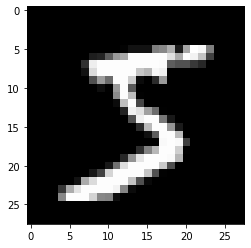

In [ ]:
plt.imshow(numpy_img, cmap='gray');

Drawing a random number

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


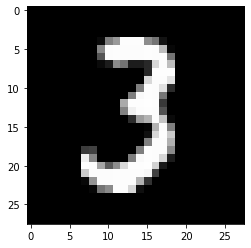

In [ ]:
i = np.random.randint(low=0, high=6000)

plt.imshow(trainloader.dataset.train_data[i].numpy(), cmap='gray')

Creating CNN

In [ ]:
class CNN(nn.Module):
    def __init__(self):
      super(CNN, self).__init__()
      self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
      self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
      self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
      self.fc1 = nn.Linear(4*4*16, 120)
      self.fc2 = nn.Linear(120, 84)
      self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
      x = self.pool(F.relu(self.conv1(x)))
      x = self.pool(F.relu(self.conv2(x)))
      x = x.view(-1, 4*4*16)
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.fc3(x)
      return x

In [ ]:
net = CNN()

batch = []

batch = next(iter(trainloader))

net.forward(torch.FloatTensor(batch[0]))

tensor([[ 0.0423, -0.0609, -0.0540,  0.0754,  0.0508,  0.0759, -0.0231,  0.0157,
          0.0550, -0.0576],
        [ 0.0453, -0.0621, -0.0584,  0.0682,  0.0471,  0.0830, -0.0145,  0.0215,
          0.0597, -0.0590],
        [ 0.0392, -0.0566, -0.0515,  0.0734,  0.0466,  0.0828, -0.0255,  0.0337,
          0.0520, -0.0572],
        [ 0.0448, -0.0558, -0.0446,  0.0704,  0.0488,  0.0789, -0.0236,  0.0157,
          0.0585, -0.0539]], grad_fn=<AddmmBackward0>)

In [ ]:
from torchsummary import summary
summary(net.cuda(), (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 24, 24]             156
         MaxPool2d-2            [-1, 6, 12, 12]               0
            Conv2d-3             [-1, 16, 8, 8]           2,416
         MaxPool2d-4             [-1, 16, 4, 4]               0
            Linear-5                  [-1, 120]          30,840
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 10]             850
Total params: 44,426
Trainable params: 44,426
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.17
Estimated Total Size (MB): 0.22
----------------------------------------------------------------


Train

In [ ]:
from tqdm import tqdm_notebook

In [ ]:
net = CNN().to(device)

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()
lr = 1e-4
optimizer = torch.optim.Adam(net.parameters(), lr=lr)
losses = []

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


  0%|          | 0/15000 [00:00<?, ?it/s]

[1,  2000] loss: 0.085
[1,  4000] loss: 0.084
[1,  6000] loss: 0.078
[1,  8000] loss: 0.077
[1, 10000] loss: 0.079
[1, 12000] loss: 0.081
[1, 14000] loss: 0.067


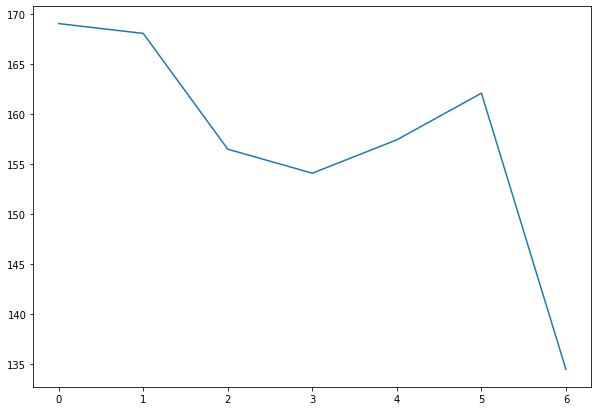

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


  0%|          | 0/15000 [00:00<?, ?it/s]

[2,  2000] loss: 0.066
[2,  4000] loss: 0.067
[2,  6000] loss: 0.062
[2,  8000] loss: 0.063
[2, 10000] loss: 0.061
[2, 12000] loss: 0.063
[2, 14000] loss: 0.063
End of learning


In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1)

for epoch in tqdm_notebook(range(2)):

    running_loss = 0.0
    for i, batch in enumerate(tqdm_notebook(trainloader)):
      X_batch, y_batch = batch

      optimizer.zero_grad()

      y_pred = net(X_batch.to(device))
      loss = loss_fn(y_pred, y_batch.to(device))
      loss.backward()
      optimizer.step()

      running_loss += loss.item()
      if i % 2000 == 1999:
        print('[%d, %5d] loss: %.3f' %
              (epoch + 1, i + 1, running_loss /2000))
        losses.append(running_loss)
        running_loss = 0.0

    ax.clear()
    ax.plot(np.arange(len(losses)),losses)
    plt.show()

print('End of learning')

Test on test

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
  for data in testloader:
    images, labels = data
    y_pred = net(images.to(device))
    _, predicted = torch.max(y_pred, 1)

    c = predicted.cpu().detach() == labels
    for i in range(4):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1

for i in range(10):
  print('Accuracy of %5s : %2d %%' % (
      classes[i], 100*class_correct[i] / class_total[i]))

Accuracy of     0 : 98 %
Accuracy of     1 : 99 %
Accuracy of     2 : 99 %
Accuracy of     3 : 98 %
Accuracy of     4 : 98 %
Accuracy of     5 : 98 %
Accuracy of     6 : 98 %
Accuracy of     7 : 97 %
Accuracy of     8 : 98 %
Accuracy of     9 : 96 %
